<a href="https://colab.research.google.com/github/Apolinar97/CS497_tweet_sentiment_analysis/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#provide acess to drive.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#locate csv file and download/load it.
downloaded = drive.CreateFile({'id':'166vhh0NJH_DyhTMYTnt-aQKkN7RyO9F2'})
downloaded.GetContentFile('Tweets.csv') 

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass
  
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#clean data
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords


df = pd.read_csv('Tweets.csv')
col_to_drop = ['tweet_id','airline_sentiment_confidence',
              'negativereason', 'negativereason_confidence', 'airline',
              'airline_sentiment_gold', 'name', 'negativereason_gold',
              'retweet_count','tweet_coord', 'tweet_created',
              'tweet_location', 'user_timezone']
df.drop(col_to_drop,axis=1, inplace=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def norm_tweet(tweet):
  tweet = tweet.lower()
  tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet)
  tweet = re.sub('[^a-z]+', ' ', tweet)
  return tweet

def tokenize_tweet(tweet):
  tweet_tk = TweetTokenizer()
  return(tweet_tk.tokenize(tweet))


def remove_stopwords(tweet_tokens):
  stop_words = stopwords.words('english')
  return([word for word in tweet_tokens if word not in stop_words])


In [7]:
#clean df.
df['text'] = df['text'].map(norm_tweet)
df['text'] = df['text'].map(tokenize_tweet)
df['text'] = df['text'].map(remove_stopwords)
df.head()

,airline_sentiment,text
0,neutral,[said]
1,positive,"[plus, added, commercials, experience, tacky]"
2,neutral,"[today, must, mean, need, take, another, trip]"
3,negative,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,"[really, big, bad, thing]"


In [8]:
#Conduct EDA
df.groupby(['airline_sentiment']).count()


,text
airline_sentiment,
negative,9178
neutral,3099
positive,2363


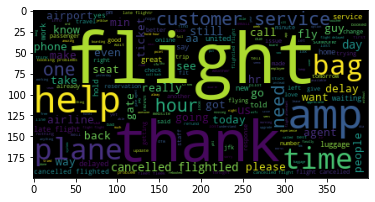

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud()
words = ' '.join((np.concatenate(df.text.values)))
wordcloud.generate(words)
plt.imshow(wordcloud)
plt.show()